#### （1）目标函数优化

目标函数：
$$ f(x)= \sum_{i=1}^{N-1}100(x_i-x_{i-1}^2)^2 + (1-x_{i-1})^2 $$

In [7]:
import numpy as np
from scipy.optimize import minimize

In [2]:
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [3]:
def rosen_der(x):     #雅克比导数矩阵
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [4]:
def rosen_hess(x):     #hessian矩阵
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [5]:
def rosen_hess_p(x, p):      #H*p的矩阵
    x = np.asarray(x)
    Hp = np.zeros_like(x)
    Hp[0] = (1200*x[0]**2 - 400*x[1] + 2)*p[0] - 400*x[0]*p[1]
    Hp[1:-1] = -400*x[:-2]*p[:-2]+(202+1200*x[1:-1]**2-400*x[2:])*p[1:-1] \
               -400*x[1:-1]*p[2:]
    Hp[-1] = -400*x[-2]*p[-2] + 200*p[-1]
    return Hp

In [9]:
#Nelder-Mead Simplex algorithm
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


array([1., 1., 1., 1., 1.])

In [10]:
#Broyden-Fletcher-Goldfarb-Shanno algorithm
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


array([1.00000004, 1.0000001 , 1.00000021, 1.00000044, 1.00000092])

In [11]:
#Newton-Conjugate-Gradient algorithm
res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 56
         Hessian evaluations: 24


array([1.        , 1.        , 1.        , 0.99999999, 0.99999999])

#### （2）常微分方程求解

$$ f'(x) + f(x) + f^2(x) = 0 , f(0)=1 $$

In [8]:
import sympy as sy

def differential_equation(x,f):
    return sy.diff(f(x),x,1)+f(x)+f(x)**2 #f(x)''+f(x)=0 二阶常系数齐次微分方程

f = sy.Function('f')   #约定函数
x = sy.symbols('x')   #约定变量

sy.pprint(sy.dsolve(differential_equation(x,f), f(x)))

         -C₁  
f(x) = ───────
             x
       C₁ - ℯ 


In [11]:
C1 = sy.symbols('C1')
eqr = -C1/(C1- sy.exp(x))
eqr1 = eqr.subs(x, 0)
sy.pprint(sy.solveset(eqr1 - 1, C1))
eqr2 = eqr.subs(C1, 1/2)

{1/2}


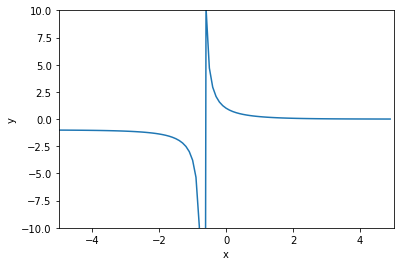

In [13]:
# 画图
import matplotlib.pyplot as plt
import numpy as np
x_1 = np.arange(-5, 5, 0.1)
y_1 = [-0.5/(0.5 - sy.exp(x)) for x in x_1]

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_1, y_1)
plt.axis([-5,5,-10,10])
plt.show()